<a href="https://colab.research.google.com/github/edso2103/Cuadernos/blob/main/Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<FONT FACE="times new roman" SIZE=5>
<br>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png"
width="100" height="100">
</img>
<br>
<i><b>Docente:</b></i> John Corredor, PhD.
<br>
<i><b>Asignatura:</b></i> Introducción a HPC
<br>
<i><b>Tema:</b></i> Regresión Lineal
<br>
<i><b>Estudiante:</b></i> Edna Sofía Orjuela Puentes
<br>
<i><b>Fecha:</b></i>31/08/22
<br>
</FONT>
</div>

#<FONT FACE="times new roman" SIZE=5> **Procesamiento y Anàlisis de Datos**

<FONT FACE="times new roman" SIZE=4> **Paso 1.** *Se importan las correspondientes bibliotecas*

In [ ]:
import pandas as pd            #Crear dataframe
import numpy as np             #Hijo de EIGEN
import seaborn as sns          #Visualizar datos
import matplotlib.pyplot as plt       #Graficar datos

<FONT FACE="times new roman" SIZE=4> **Paso 2.** *Se carga el dataset en un objeto pandas "Dataframe"*

In [ ]:
url='/content/drive/MyDrive/Colab Notebooks/archive/insurance.csv'
df_seguro=pd.read_csv(url)
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<FONT FACE="times new roman" SIZE=4> **Paso 3.** *Se requiere informaciòn general sobre el dataset*

In [ ]:
df_seguro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<FONT FACE="times new roman" SIZE=4> **Paso 4.** *Se requiere un resumen estadìstico de las variables numèricas del df*

In [ ]:
df_seguro.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<FONT FACE="times new roman" SIZE=4> **Paso 5.** *Se requiere hacer una gràfica que represente los datos desaparecidos*

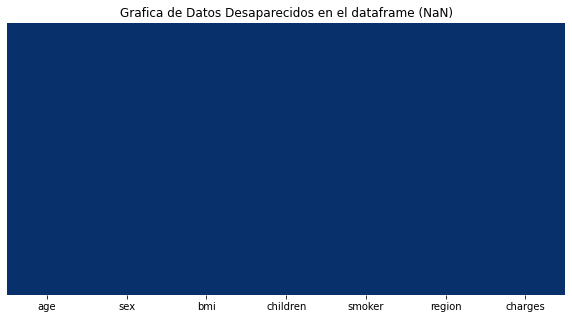

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df_seguro.isnull(),cbar=False,yticklabels=False,cmap='Blues_r')
plt.title("Grafica de Datos Desaparecidos en el dataframe (NaN)")
plt.show()

<FONT FACE="times new roman" SIZE=4> **Paso 6.** *Se requiere visualizar la correlaciòn entre las variables, la correlaciòn representa la afinidad o relaciòn entre las variables.*


*   Si la correlaciòn es cerca a 1, la relaciòn es directamente proporcional
*   Si la correlaciòn es cerca a -1, la relaciòn es inversamente propocional
*   Si la correlaciòn es cerca a 0, no existe relaciòn entre las variables 



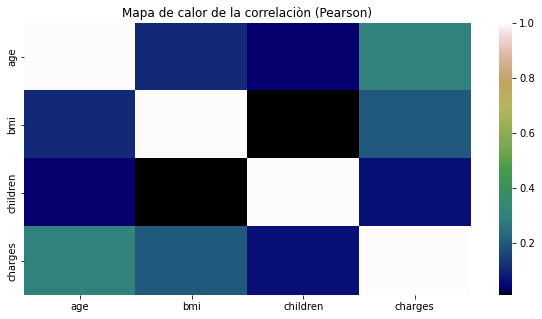

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df_seguro.corr(),cmap='gist_earth')
plt.title("Mapa de calor de la correlaciòn (Pearson)")
plt.show()

<FONT FACE="times new roman" SIZE=4>*Se observa que la correlaciòn entre las variables no es tan significativa.*  
*A continuaciòn, se define la variable 'charges' como dependiente, es decir, es la que vamos a predecir.*


<FONT FACE="times new roman" SIZE=4> **Paso 7.** *Se requiere graficar la distribuciòn de la variable $CHARGE$. Se requiere la distribuciòn sin y con escala logarìtmica (las dos al tiempo)*


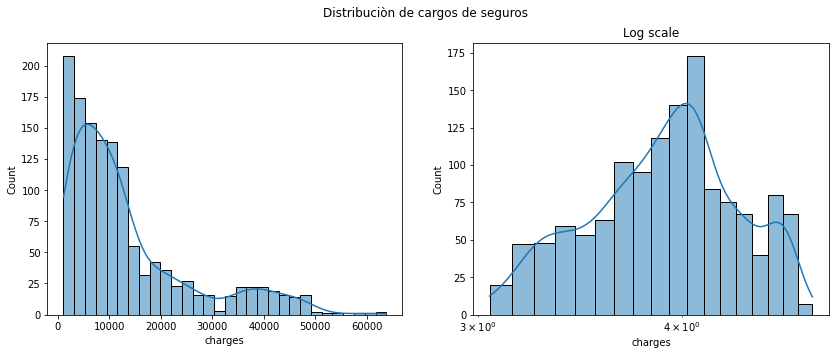

In [ ]:
plt.figure(figsize=(14,5))
plt.suptitle("Distribuciòn de cargos de seguros")
plt.subplot(121)
sns.histplot(df_seguro['charges'],kde=True)

plt.subplot(122)
sns.histplot(np.log10(df_seguro['charges']),kde=True)
plt.xscale('log')
plt.title('Log scale')
plt.show()



<FONT FACE="times new roman" SIZE=4>*Se observa que los datos de la columna 'charges' al estar en escala logarìtmica, presentan una distribuciòn normal,es decir, se presenta una situaciòn homògenea con una desviaciòn estàndar baja*

<FONT FACE="times new roman" SIZE=4>**Anàlisis de resultados**
* El gràfico de la derecha presenta alto 'skewed', es decir sesgado a la derecha
* El gràfico de la izquierda, se le ha aplicado el logaritmo base 10
* El gràfico con el logaritmo presenta una tendencia a una distribuciòn normal
* Se recomienda para los calculos sobre los datos 'charge', sean siempre en escala logarìtmica


<FONT FACE="times new roman" SIZE=4> **Paso 8.** *Se grafica* 

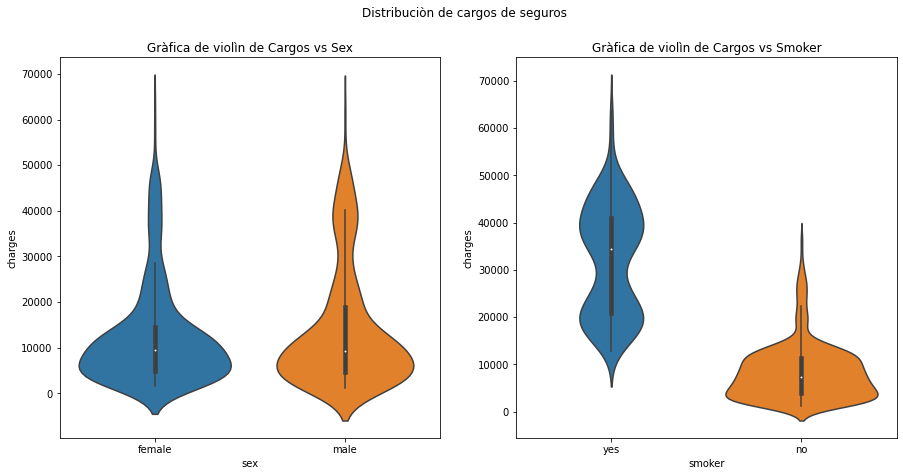

In [ ]:
fig=plt.figure(figsize=(15,7))
fig.suptitle("Distribuciòn de cargos de seguros")

axes=fig.add_subplot(121)
sns.violinplot(data=df_seguro,x='sex',y='charges',ax=axes)
axes.set_title('Gràfica de violìn de Cargos vs Sex')

axes=fig.add_subplot(122)
sns.violinplot(data=df_seguro,x='smoker',y='charges',ax=axes)
axes.set_title('Gràfica de violìn de Cargos vs Smoker')
plt.show()


<FONT FACE="times new roman" SIZE=4>**Anàlisis de los resultados**
* En el gràfico de la izquierda, la cantidad de pagos al seguro no cambia con respecto a la categorìa de sexo, al contrario, su comportamiento es similar.
* En promedio, hombres y mujeres pagan 8.000
* El gràfico de la derecha, la cantidad de pagos al seguro varìa con respecto a si fuma o no fuma. Las personas que fuman pagan màs seguro que las que no.
* En promedio el costo de los fumadores es de apròximadamente 35.000 dòlares, mientras que para los no fumadores es de apròximadamente 8.000 dòlares
* En este tipo de gràficos, el ancho del violin hace referencia a la densidad de los datos, el punto blanco es la mediana, y el promedio corresponde al cuadrado negro en el centro.

<FONT FACE="times new roman" SIZE=4>**Paso 9.** *Se hace una gràfica Charges, Sex, Children*

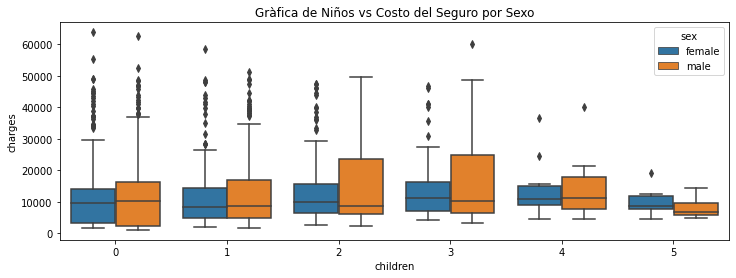

In [ ]:
#Para hacer la dicotomìa, se pone el 'hue', para hacer cajas de bigote por categoria de sexo
plt.figure(figsize=(12,4))
plt.title('Gràfica de Niños vs Costo del Seguro por Sexo')
sns.boxplot(data=df_seguro,x='children', y='charges', hue='sex')
plt.show()

<FONT FACE="times new roman" SIZE=4>**Paso 10.** *Se hace una tabla estadìstica para interpretar mejor la gràfica anterior. La cual, consiste en la agrupaciòn de los niños segùn los costos del seguro*

In [ ]:
df_seguro.groupby('children').agg(['mean','min','max'])['charges'].T

children,0,1,2,3,4,5
mean,12365.975602,12731.171832,15073.563734,15355.318367,13850.656311,8786.035247
min,1121.873900,1711.026800,2304.002200,3443.064000,4504.662400,4687.797000
max,63770.428010,58571.074480,49577.662400,60021.398970,40182.246000,19023.260000


<FONT FACE="times new roman" SIZE=4>**Anàlisis de los resultados**  
Segùn el promedio:
* Se observa que los cargos por seguro son mayores cuando se tienen 2 y 3 hijos
* El promedio del costo del seguro es similar en todos los casos
* Al tener cinco hijos o màs el costo del seguro es menos
* Las gràficas para todos los valores de 'children' presentan datos outliers, o datos atìpicos , segùn se espera su comportamiento o por lo alejado del promedio

<FONT FACE="times new roman" SIZE=4>**Paso 11.** *Se quiere analizar la informaciòn dada por: Charges, region y el sex*

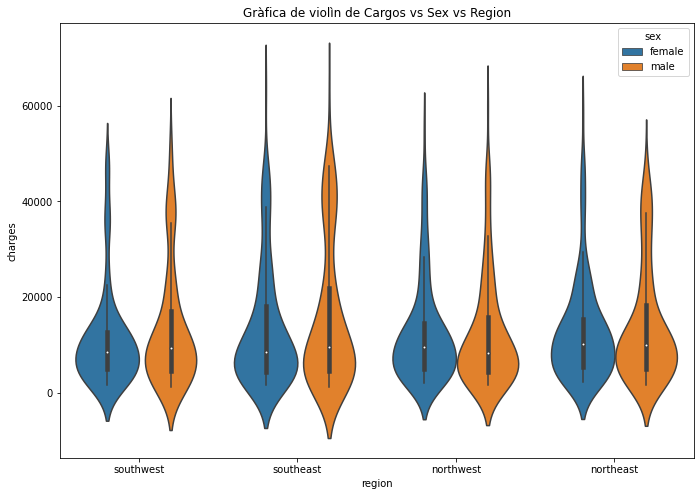

In [ ]:
fig=plt.figure(figsize=(25,8))
axes=fig.add_subplot(121)
sns.violinplot(data=df_seguro,x='region',y='charges',hue='sex',ax=axes)
axes.set_title('Gràfica de violìn de Cargos vs Sex vs Region')
plt.show()

<FONT FACE="times new roman" SIZE=4>**Anàlisis de los resultados**  
* Para el caso de la gràfica de 'Charges' vs 'Region' vs 'Sexo' se puede observar que tanto la regiòn como el sexo, no varìa tanto con respecto al cargo, en todas las regiones (norte, sur, este, oeste), se presenta un promedio de apròximadamente 9.000 dòlares.
* Ademàs se evidencia que hay varios datos atìpicos 

<FONT FACE="times new roman" SIZE=4>**Manejo de variables Categòricas**  
* La idea principal es imputarlas, es decir, cambiar el valor nominal/ordinal a valores numèricos
* Las variables categòricas binarias, se decodificaran con la funciòn apply generando una funciòn incògnita o lambda.
* Las variables categòricas nominales de mùltiples categorìas, se usarà la funciòn **get_dummies** de pandas

In [ ]:
print(f"Las categorìas de sex son: \n {df_seguro['sex'].unique()}")
print(f"\nLas categorìas de smoker son: \n {df_seguro['smoker'].unique()}")
print(f"\nLas categorìas de region son: \n {df_seguro['region'].unique()}")

Las categorìas de sex son: 
 ['female' 'male']

Las categorìas de smoker son: 
 ['yes' 'no']

Las categorìas de region son: 
 ['southwest' 'southeast' 'northwest' 'northeast']


<FONT FACE="times new roman" SIZE=4>**Paso 12.** *Se cambia la columna 'sex' y 'smoker'. Se aplica la función lambda x=0 si es male, x=1 en el caso contrario*

In [ ]:
df_seguro['sex']=df_seguro['sex'].apply(lambda x:0 if x=='male' else 1)
df_seguro['smoker']=df_seguro['smoker'].apply(lambda x:0 if x=='yes' else 1)
df_seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,southwest,16884.92400
1,18,0,33.770,1,1,southeast,1725.55230
2,28,0,33.000,3,1,southeast,4449.46200
3,33,0,22.705,0,1,northwest,21984.47061
4,32,0,28.880,0,1,northwest,3866.85520


<FONT FACE="times new roman" SIZE=4>**Paso 13.** *Se usa la función get_dummies de pandas para crear una columna nueva por cada categoría. Cada columna nueva tendrá un '1' si aparece y '0' en caso contrario, para luego poder borrar la columna original*

In [ ]:
df_seguro=pd.get_dummies(df_seguro,prefix=['region'])
df_seguro.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,0,16884.92400,0,0,0,1
1,18,0,33.770,1,1,1725.55230,0,0,1,0
2,28,0,33.000,3,1,4449.46200,0,0,1,0
3,33,0,22.705,0,1,21984.47061,0,1,0,0
4,32,0,28.880,0,1,3866.85520,0,1,0,0


<FONT FACE="times new roman" SIZE=4>**Paso 14.** *Visualización de los datos por medio de una gráfica de nube de puntos de cada dato, con el fin de observar sus tendencias y sus relaciones. Se utilizará $scatterplot$ para visualizar el comportamiento de cada variable frente a la variable 'charges'* 

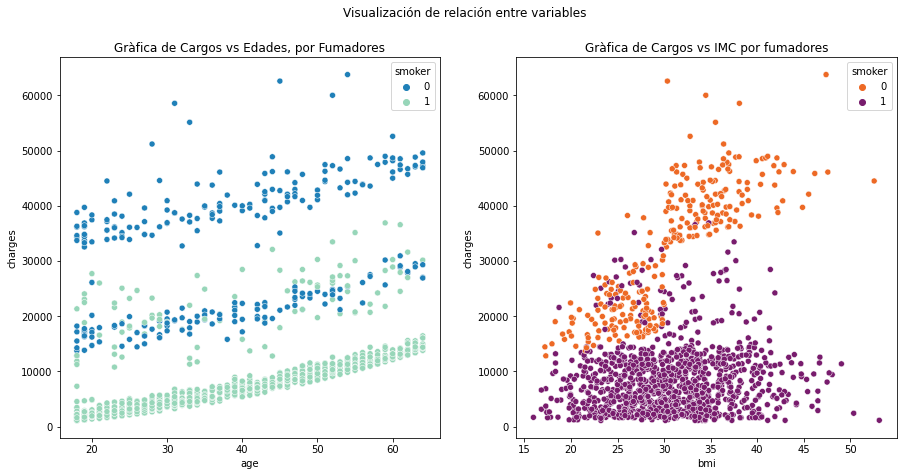

In [ ]:
#Se crea una matriz para graficar 
#En primer lugar 'age' vs 'charges0

fig=plt.figure(figsize=(15,7))
fig.suptitle("Visualización de relación entre variables")

axes=fig.add_subplot(121)
sns.scatterplot(data=df_seguro,x='age',y='charges',hue='smoker',palette='YlGnBu_r',ax=axes)
axes.set_title('Gràfica de Cargos vs Edades, por Fumadores')

axes=fig.add_subplot(122)
sns.scatterplot(data=df_seguro,x='bmi',y='charges',hue='smoker',palette='inferno_r',ax=axes)
axes.set_title('Gràfica de Cargos vs IMC por fumadores')
plt.show()


<FONT FACE="times new roman" SIZE=4>**Anàlisis de los resultados**  
1. En la gráfica de Cargos vs Edad por Fumadores
  * Se observan tres patrones a simple vista
  * El primer patrón es cuando los datos representan los fumadores para todas las edades el costo del seguro es significativamente grande. (Parte superior de la gráfica). 
  * El segundo patrón es cuando los datos representan los no fumadores para todas las edades es mucho menor (Parte inferior de la gráfica).
  * El tercer patrón se encuentra en la mitad de la gráfica, y se observa que no hay relación entre loss fumadores y no fumadores.
  * La edad presenta una relación positiva, es decir directamente proporcional frente a los cargos. 


#<FONT FACE="times new roman" SIZE=5> **Regresión Lineal**

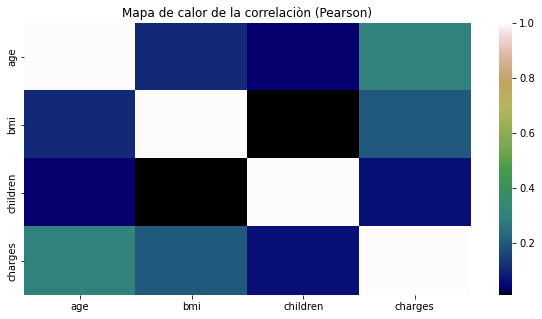

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df_seguro.corr(),cmap='gist_earth')
plt.title("Mapa de calor de la correlaciòn (Pearson)")
plt.show()

<FONT FACE="times new roman" SIZE=4> **Paso 13.** *Se importa la biblioteca de sklearn para entrenar los datos, y calcular la regresión*

In [ ]:
from sklearn.model_selection import train_test_split #división de datos (entrenamiento y prueba)
from sklearn.linear_model import LinearRegression #regresión lineal
from sklearn.metrics import mean_squared_error, r2_score

<FONT FACE="times new roman" SIZE=4> **Paso 14.** *Se crean dos arreglos x y y con los datos de las columnas 'age' y 'charges' respectivamente y se grafican*

In [ ]:
X=np.array(df_seguro[['age']])
y=np.array(df_seguro [['charges']])

In [ ]:
print(X.shape)
print(y.shape)

(1338, 1)
(1338, 1)


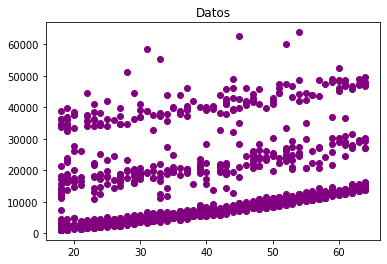

In [ ]:
plt.scatter(X,y,label='data', color='purple')
plt.title('Datos');

<FONT FACE="times new roman" SIZE=4> **Paso 15.** *Se realiza la división de datos en entrenamiento y prueba, teniendo en cuenta que para los de entrenamiento se usa el 0.8 de los datos.
Esta división se hace con el fin de que el modelo aprenda con los datos de entrenamiento y luego pueda corroborar si el ajuste del modelo con respecto a los datos es el correcto.*


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.2,
                                               random_state=0)

<FONT FACE="times new roman" SIZE=4> **Paso 16.** *Se imprime el tamaño de los datos de entrenamiento y prueba*

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1070, 1)
(1070, 1)
(268, 1)
(268, 1)


<FONT FACE="times new roman" SIZE=4> **Paso 17.** *Se ajustan los datos con el modelo de regresión lineal, y se calcula la precisión*

In [ ]:
LR = LinearRegression()
#Se entrena el modelo con los datos separados previamente 
LR.fit(X_train,y_train)
#Se realiza la prediccion con los datos de prueba
y_pred= LR.predict(X_test)

<FONT FACE="times new roman" SIZE=4> **Paso 18.** *Se muestra la pendiente y el punto de intersección encontrados y se grafica el modelo*

In [ ]:
#Se imprime el punto de interseccion 
b=LR.intercept_[0]
#Se imprime la pendiente
m=LR.coef_[0][0]
print("La pendiente de la recta es",m)
print("El punto de corte es",b)

La pendiente de la recta es 238.37156960694676
El punto de corte es 3882.8586788884386


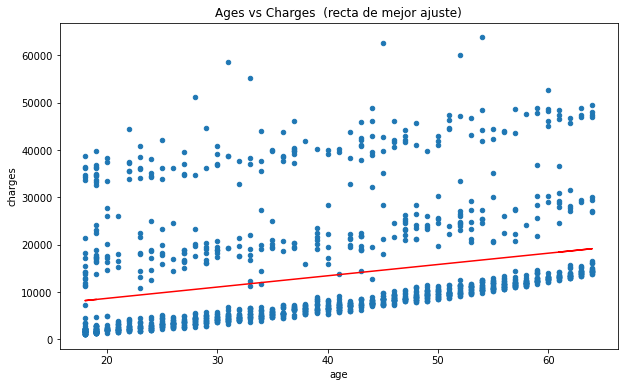

In [ ]:
df_seguro.plot(kind='scatter',x='age',y='charges',figsize= (10,6))
plt.title('Ages vs Charges  (recta de mejor ajuste)')
plt.plot(X,(m*X)+b,'r')
plt.show()

<FONT FACE="times new roman" SIZE=4> **Paso 19.** *Se halla el error cuadrático medio*

In [ ]:
# Se calcula (real - estimado)²
#Se espera un error 0
mean_squared_error(y_test,y_pred)

139176465.01367894

<FONT FACE="times new roman" SIZE=4> **Paso 20.** *Se halla el coeficiente de determinación R2*

In [ ]:
#Para determinar la calidad del modelo
#El rango esta entre 0 y 1, siendo lo mejor 1
r2_score(y_test, y_pred)

0.12539120236863355